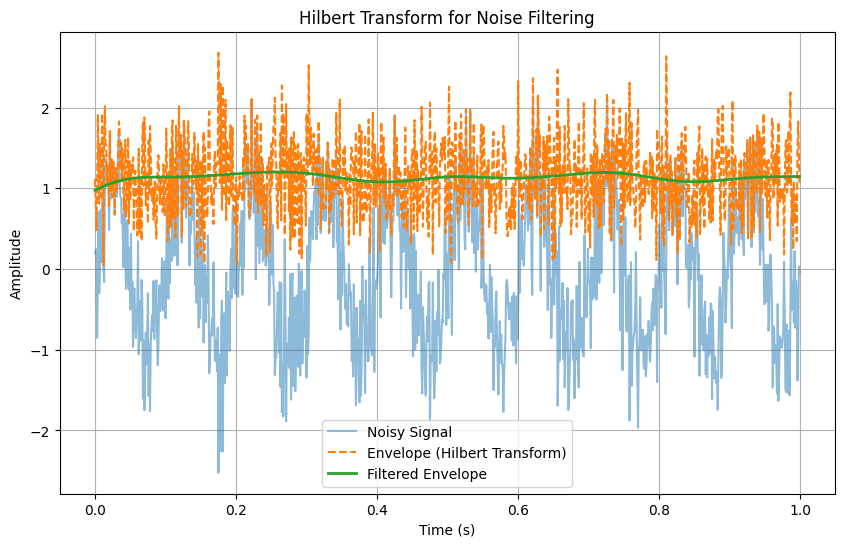

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, filtfilt

# Generate a signal with Gaussian noise
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t)  # 10 Hz sine wave
noise = np.random.normal(0, 0.5, signal.shape)  # Gaussian noise
noisy_signal = signal + noise

# Compute the analytic signal using the Hilbert Transform
analytic_signal = hilbert(noisy_signal)
envelope = np.abs(analytic_signal)  # Envelope of the signal

# Design a low-pass filter to smooth the envelope
def lowpass_filter(data, cutoff=10, fs=1000, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

smoothed_envelope = lowpass_filter(envelope, cutoff=5, fs=fs)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, alpha=0.5, label="Noisy Signal")
plt.plot(t, envelope, label="Envelope (Hilbert Transform)", linestyle="dashed")
plt.plot(t, smoothed_envelope, label="Filtered Envelope", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Hilbert Transform for Noise Filtering")
plt.grid()
plt.show()


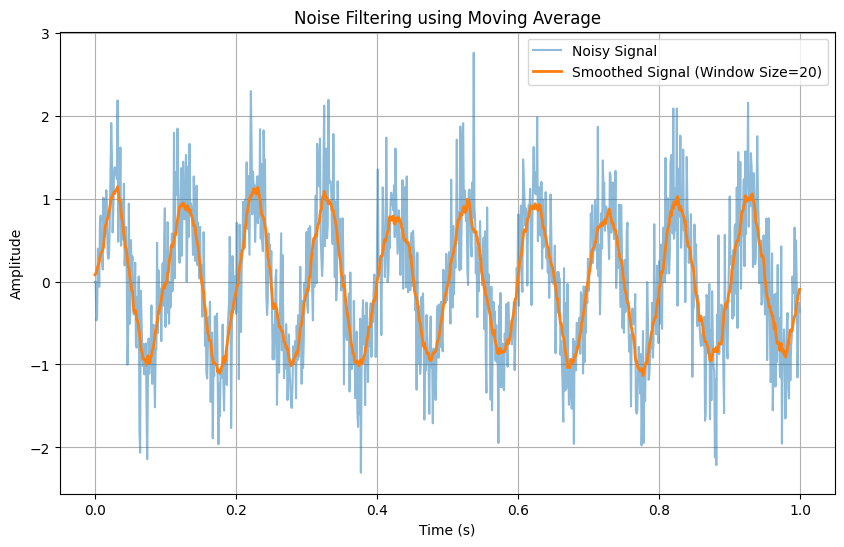

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal with Gaussian noise
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t)  # 10 Hz sine wave
noise = np.random.normal(0, 0.5, signal.shape)  # Gaussian noise
noisy_signal = signal + noise

# Moving Average Filter Function
def moving_average_filter(data, window_size=10):
    kernel = np.ones(window_size) / window_size  # Create averaging kernel
    return np.convolve(data, kernel, mode='same')  # Apply convolution

# Apply the filter
window_size = 20  # Adjust window size for more/less smoothing
smoothed_signal = moving_average_filter(noisy_signal, window_size)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, alpha=0.5, label="Noisy Signal")
plt.plot(t, smoothed_signal, label=f"Smoothed Signal (Window Size={window_size})", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Noise Filtering using Moving Average")
plt.grid()
plt.show()
